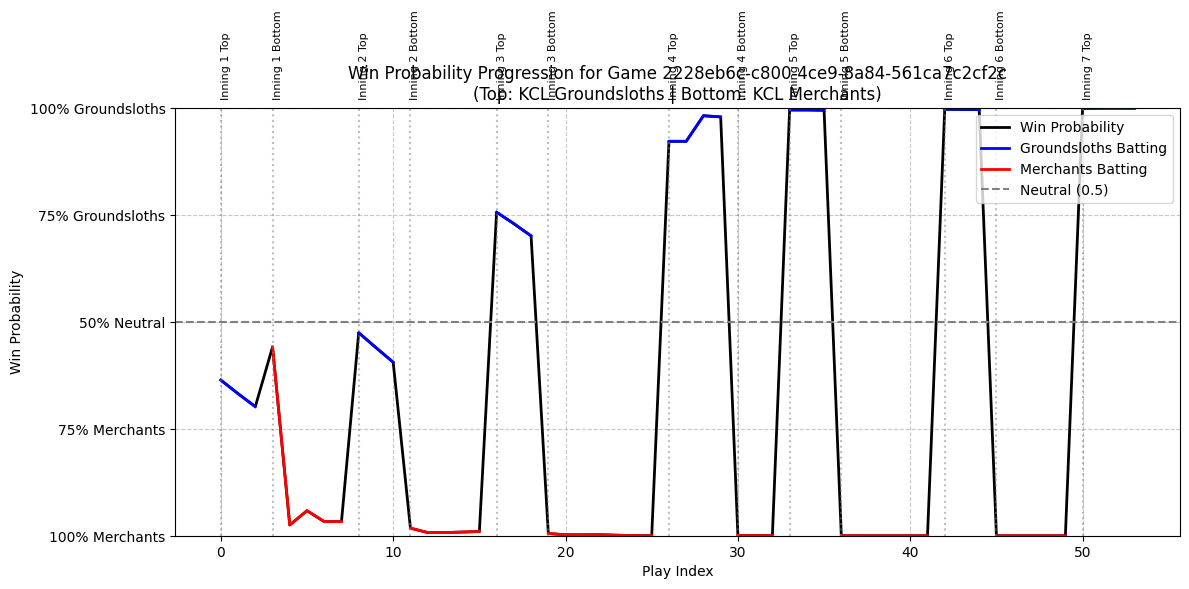

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Read the dataset
df = pd.read_csv('wpa_results.csv')

# Select a single game (replace with desired GameID or loop through GameIDs)
game_id = '8e6503c4-43dd-4ba3-9b22-05e3088d1e6f'  # Example: First GameID in the dataset
game_data = df[df['GameID'] == game_id].copy()

# Compute WP for Groundsloths (away team)
# When Batting_Team is 'away', WP_after is Groundsloths' WP
# When Batting_Team is 'home', Groundsloths' WP is 1 - WP_after
game_data['Groundsloths_WP'] = game_data.apply(
    lambda row: row['WP_after'] if row['Batting_Team'] == 'away' else 1 - row['WP_after'], axis=1
)

# Create a play index for the x-axis
game_data['PlayIndex'] = range(len(game_data))

# Initialize the plot
plt.figure(figsize=(12, 6))

# Plot the continuous WP line
plt.plot(game_data['PlayIndex'], game_data['Groundsloths_WP'], color='black', linewidth=2, label='Win Probability')

# Overlay colored segments for each half-inning
for inning in game_data['Inning'].unique():
    # Top of inning (Groundsloths batting)
    top_data = game_data[(game_data['Inning'] == inning) & (game_data['Batting_Team'] == 'away')]
    if not top_data.empty:
        plt.plot(top_data['PlayIndex'], top_data['Groundsloths_WP'], color='blue', linewidth=2, label='Groundsloths Batting' if inning == 1 else '')
    
    # Bottom of inning (Merchants batting)
    bottom_data = game_data[(game_data['Inning'] == inning) & (game_data['Batting_Team'] == 'home')]
    if not bottom_data.empty:
        plt.plot(bottom_data['PlayIndex'], bottom_data['Groundsloths_WP'], color='red', linewidth=2, label='Merchants Batting' if inning == 1 else '')

# Add neutral line at 0.5
plt.axhline(y=0.5, color='gray', linestyle='--', label='Neutral (0.5)')

# Customize the plot
plt.xlabel('Play Index')
plt.ylabel('Win Probability')
plt.title(f'Win Probability Progression for Game {game_id}\n(Top: KCL Groundsloths | Bottom: KCL Merchants)')
plt.ylim(0, 1)
plt.yticks([0, 0.25, 0.5, 0.75, 1], ['100% Merchants', '75% Merchants', '50% Neutral', '75% Groundsloths', '100% Groundsloths'])
plt.grid(True, linestyle='--', alpha=0.7)

# Add inning markers
for inning in game_data['Inning'].unique():
    # Find the first play of each half-inning
    top_start = game_data[(game_data['Inning'] == inning) & (game_data['Batting_Team'] == 'away')]['PlayIndex'].min()
    bottom_start = game_data[(game_data['Inning'] == inning) & (game_data['Batting_Team'] == 'home')]['PlayIndex'].min()
    
    if pd.notna(top_start):
        plt.axvline(x=top_start, color='gray', linestyle=':', alpha=0.5)
        plt.text(top_start, 1.02, f'Inning {int(inning)} Top', rotation=90, verticalalignment='bottom', fontsize=8)
    if pd.notna(bottom_start):
        plt.axvline(x=bottom_start, color='gray', linestyle=':', alpha=0.5)
        plt.text(bottom_start, 1.02, f'Inning {int(inning)} Bottom', rotation=90, verticalalignment='bottom', fontsize=8)

# Add legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()